## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Load Data

In [ ]:
# Load data from csv and take a look in the first rows
raw_data = pd.read_csv('Absenteeism_data.csv')
df = raw_data.copy()
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


## Basic Data Exploration

In [ ]:
# Show columns
df.columns

Index(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

In [ ]:
# Rename columns to make them more Python-friendly
df.columns = df.columns.str.replace(' ', '_')

# Display the updated column names
print(df.columns)

Index(['ID', 'Reason_for_Absence', 'Date', 'Transportation_Expense',
       'Distance_to_Work', 'Age', 'Daily_Work_Load_Average', 'Body_Mass_Index',
       'Education', 'Children', 'Pets', 'Absenteeism_Time_in_Hours'],
      dtype='object')


In [ ]:
# Show the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason_for_Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation_Expense     700 non-null    int64  
 4   Distance_to_Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily_Work_Load_Average    700 non-null    float64
 7   Body_Mass_Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism_Time_in_Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [ ]:
# Show number of rows and columns
df.shape

(700, 12)

In [ ]:
# Search for duplicate rows
df.duplicated().sum()

8

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# New shape
df.shape

(692, 12)

In [ ]:
# Drop the 'ID' column since it does not add value to the research
df.drop('ID', axis=1, inplace=True)

In [ ]:
# Split the reasons for absence into multiple dummy variables and group them
sorted(df['Reason_for_Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

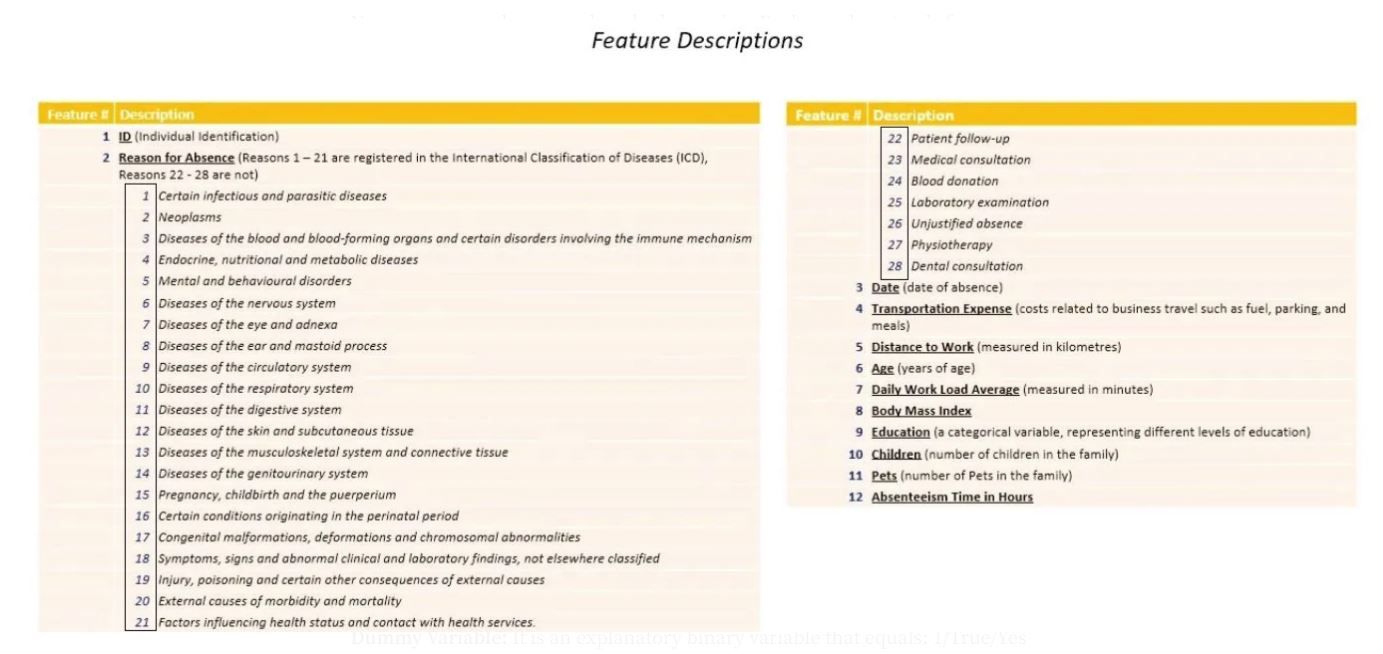

In [ ]:
# Create dummy variables for 'Reason for Absence'
reason_dummies = pd.get_dummies(df['Reason_for_Absence'], drop_first=True)
reason_dummies

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Group the dummy variables into specified groups
group1 = reason_dummies.iloc[:, :14].max(axis=1)
group2 = reason_dummies.iloc[:, 14:17].max(axis=1)
group3 = reason_dummies.iloc[:, 17:21].max(axis=1)
group4 = reason_dummies.iloc[:, 21:].max(axis=1)

In [ ]:
# Add the new dummy variables to the DataFrame
df = pd.concat([df, group1, group2, group3, group4], axis=1)

# Drop the 'Reason for Absence' column
df.drop('Reason_for_Absence', axis=1, inplace=True)

# Rename the new columns
df.columns = df.columns[:-4].tolist() + ['Group_1', 'Group_2', 'Group_3', 'Group_4']

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract month and day of the week
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Drop the 'Date' column
df.drop('Date', axis=1, inplace=True)

In [ ]:
# Turn the data from the 'Education' column into binary data
df['Education'].unique()

array([1, 3, 2, 4])

In [ ]:
# Map values in 'Education' column to binary
df['Education'] = df['Education'].map({1: 0, 2: 1, 3: 1, 4: 1})

In [ ]:
df['Education'] .value_counts()

0    575
1    117
Name: Education, dtype: int64

In [ ]:
# Show descriptive statistics for numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transportation_Expense,692.0,222.838150,66.283606,118.000,179.000,225.000,260.000,388.000
Distance_to_Work,692.0,29.946532,14.781330,5.000,16.000,26.000,50.000,52.000
Age,692.0,36.387283,6.405520,27.000,31.000,37.000,40.000,58.000
Daily_Work_Load_Average,692.0,271.784341,40.131653,205.917,241.476,264.249,294.217,378.884
Body_Mass_Index,692.0,26.713873,4.245939,19.000,24.000,25.000,31.000,38.000
Education,692.0,0.169075,0.375089,0.000,0.000,0.000,0.000,1.000
Children,692.0,1.031792,1.113852,0.000,0.000,1.000,2.000,4.000
Pets,692.0,0.695087,1.170466,0.000,0.000,0.000,1.000,8.000
Absenteeism_Time_in_Hours,692.0,6.815029,12.733170,0.000,2.000,3.000,8.000,120.000
Group_1,692.0,0.252890,0.434983,0.000,0.000,0.000,1.000,1.000


In [ ]:
df.head(10)

,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours,Group_1,Group_2,Group_3,Group_4,Month,Day_of_Week
0,289,36,33,239.554,30,0,2,1,4,0,0,0,1,7,1
1,118,13,50,239.554,31,0,1,0,0,0,0,0,0,7,1
2,179,51,38,239.554,31,0,0,0,2,0,0,0,1,7,2
3,279,5,39,239.554,24,0,2,0,4,1,0,0,0,7,3
4,289,36,33,239.554,30,0,2,1,2,0,0,0,1,7,3
5,179,51,38,239.554,31,0,0,0,2,0,0,0,1,7,4
6,361,52,28,239.554,27,0,1,4,8,0,0,1,0,7,4
7,260,50,36,239.554,23,0,4,0,4,0,0,0,1,7,4
8,155,12,34,239.554,25,0,2,0,40,0,0,1,0,7,0
9,235,11,37,239.554,29,1,1,1,8,0,0,1,0,7,0


In [ ]:
# Show data types of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transportation_Expense     692 non-null    int64  
 1   Distance_to_Work           692 non-null    int64  
 2   Age                        692 non-null    int64  
 3   Daily_Work_Load_Average    692 non-null    float64
 4   Body_Mass_Index            692 non-null    int64  
 5   Education                  692 non-null    int64  
 6   Children                   692 non-null    int64  
 7   Pets                       692 non-null    int64  
 8   Absenteeism_Time_in_Hours  692 non-null    int64  
 9   Group_1                    692 non-null    uint8  
 10  Group_2                    692 non-null    uint8  
 11  Group_3                    692 non-null    uint8  
 12  Group_4                    692 non-null    uint8  
 13  Month                      692 non-null    int64  

In [ ]:
# Lets reorder the columns
columns_df = ['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Month',
              'Day_of_Week', 'Transportation_Expense', 'Distance_to_Work', 'Age',
              'Daily_Work_Load_Average', 'Body_Mass_Index', 'Education', 'Children',
              'Pets', 'Absenteeism_Time_in_Hours']

df = df[columns_df]
df.head()

,Group_1,Group_2,Group_3,Group_4,Month,Day_of_Week,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


## Save Preprocessed Data to a Dataframe

In [ ]:
# Save the preprocessed data to a CSV file
df.to_csv('df_preprocessed.csv', index=False)

## Load the Preprocessed Data

In [ ]:
# Load the preprocessed data
df_prep = pd.read_csv('df_preprocessed.csv')

# Display the first few rows of the DataFrame
df_prep.head()

,Group_1,Group_2,Group_3,Group_4,Month,Day_of_Week,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


## Creating Targets

We will find the median of the target variable 'Absenteeism_Time_in_Hours' and we will assign two categories, one below the median which will stand for a normal absenteeism and one over the median that will stand for excessive absenteeism

In [ ]:
df_prep['Absenteeism_Time_in_Hours'].median()

3.0

So if someone is absent for less than equal three hours will be assigned with 0, and the rest will be assigned to 1.

In [ ]:
targets = np.where(df_prep['Absenteeism_Time_in_Hours'] > 3, 1, 0)

In [ ]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,

In [ ]:
df_prep['Excessive_Absenteeism'] = targets
df_prep.head()

,Group_1,Group_2,Group_3,Group_4,Month,Day_of_Week,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours,Excessive_Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [ ]:
# Check the balance of the column
df_prep['Excessive_Absenteeism'].value_counts()/df_prep.shape[0]

0    0.539017
1    0.460983
Name: Excessive_Absenteeism, dtype: float64

As we can see, the target variable is almost balanced with 54% zeros and 46% ones. Also, we won't be needing anymore the original 'Absenteeism_Time_in_Hours' column. The 'Daily_Work_Load_Average' is ommitted after the intial logistic regression where we saw that does not offer value to the model.

In [ ]:
# Drop 'Absenteeism_Time_in_Hours' column
df_model = df_prep.drop(['Absenteeism_Time_in_Hours', 'Daily_Work_Load_Average'], axis=1)

In [ ]:
# Check the shape of the dataframe
df_model.shape

(692, 14)

## Define Features and Target Variable

In [ ]:
# Define features (independent variables)
features = df_model.drop('Excessive_Absenteeism', axis=1)

# Define the target variable
target = df_model['Excessive_Absenteeism']

## Perform Train-Test Split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Scale the Data

In [ ]:
# Columns to scale
columns_to_scale = ['Month', 'Day_of_Week', 'Transportation_Expense', 'Distance_to_Work', 'Age',
                    'Body_Mass_Index', 'Children', 'Pets']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform only the specified columns
X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Transform the testing data for the specified columns
X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

## Perform Logistic Regression

In [ ]:
# Initialize logistic regression model
model = LogisticRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the scaled testing data
predictions_scaled = model.predict(X_test_scaled)

# Evaluate the model accuracy on the scaled data
accuracy_scaled = accuracy_score(y_test, predictions_scaled)
print(f"Accuracy on scaled data: {accuracy_scaled}")

Accuracy on scaled data: 0.762589928057554


We achieve an accuracy of 76.26%.

## Finding Intercept and Coefficients

In [ ]:
# Get the intercept
intercept = model.intercept_
print(f"Intercept: {intercept}")

Intercept: [-1.56853067]


In [ ]:
# Get the coefficients
coefficients = model.coef_
print(f"Coefficients: {coefficients}")

Coefficients: [[ 2.76056533  0.50600345  3.31064518  0.67613504  0.10130736 -0.13713966
   0.62177505 -0.11085991 -0.27306753  0.23112298 -0.46967814  0.37829115
  -0.52836487]]


In [ ]:
# Let's see which coefficients are exactly
feature_name = features.columns.values
feature_name

array(['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Month', 'Day_of_Week',
       'Transportation_Expense', 'Distance_to_Work', 'Age',
       'Body_Mass_Index', 'Education', 'Children', 'Pets'], dtype=object)

In [ ]:
# Put the coefficients in a DataFrame
summary = pd.DataFrame(columns=['Feature_Names'], data=feature_name)
summary['Coefficient'] = np.transpose(model.coef_)
summary

,Feature_Names,Coefficient
0,Group_1,2.760565
1,Group_2,0.506003
2,Group_3,3.310645
3,Group_4,0.676135
4,Month,0.101307
5,Day_of_Week,-0.137140
6,Transportation_Expense,0.621775
7,Distance_to_Work,-0.110860
8,Age,-0.273068
9,Body_Mass_Index,0.231123


In [ ]:
# Let's add also the intercept to this table in the first row
summary.index = summary.index + 1
summary.loc[0] = ['Intercept', model.intercept_[0]]
summary = summary.sort_index()
summary

,Feature_Names,Coefficient
0,Intercept,-1.568531
1,Group_1,2.760565
2,Group_2,0.506003
3,Group_3,3.310645
4,Group_4,0.676135
5,Month,0.101307
6,Day_of_Week,-0.137140
7,Transportation_Expense,0.621775
8,Distance_to_Work,-0.110860
9,Age,-0.273068


## Interpreting the coefficients

In [ ]:
summary['Odds_Ratio'] = np.exp(summary.Coefficient)
summary

,Feature_Names,Coefficient,Odds_Ratio
0,Intercept,-1.568531,0.208351
1,Group_1,2.760565,15.808778
2,Group_2,0.506003,1.658649
3,Group_3,3.310645,27.402800
4,Group_4,0.676135,1.966263
5,Month,0.101307,1.106617
6,Day_of_Week,-0.137140,0.871848
7,Transportation_Expense,0.621775,1.862231
8,Distance_to_Work,-0.110860,0.895064
9,Age,-0.273068,0.761041


In [ ]:
summary.sort_values(by='Odds_Ratio', ascending=False)

,Feature_Names,Coefficient,Odds_Ratio
3,Group_3,3.310645,27.402800
1,Group_1,2.760565,15.808778
4,Group_4,0.676135,1.966263
7,Transportation_Expense,0.621775,1.862231
2,Group_2,0.506003,1.658649
12,Children,0.378291,1.459788
10,Body_Mass_Index,0.231123,1.260014
5,Month,0.101307,1.106617
8,Distance_to_Work,-0.110860,0.895064
6,Day_of_Week,-0.137140,0.871848


Here, a feature is not particularly important if:
- its coefficient is around 0
- its odds ratio is around 1.

Viewing the above results we can re-run the logistic regression ommiting the Daily_Work_Load_Average.

## Save The Model

In [ ]:
with open('model', 'wb') as file:
  pickle.dump(model, file)